#📌 Extracción

Importando Bibliotecas de Python

In [121]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pointbiserialr
import json
import datetime
import chardet

In [122]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)

# Verificar estado de la respuesta
response.status_code


200

In [123]:
data = response.json()
type(data)

list

DATAFRAME JSON ANIDADO

In [124]:

pd.json_normalize (data, sep= '_')


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [125]:
data=pd.json_normalize (data, sep= '_')
data


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

In [126]:
data.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [127]:
data.shape

(7267, 21)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

La columna  "account_Charges_Total" es tipo objet tiene que ser tipo numerico

In [129]:
data['account_Charges_Total'].head()

,account_Charges_Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4


Convertir el tipo de  dato objet a numerico

In [130]:
data['account_Charges_Total'] = pd.to_numeric(
    data['account_Charges_Total'],
    errors='coerce'
)

Convertimos la variable objetivo  a binario

In [131]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [132]:
cols_churn = [
    'Churn',
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'account_Contract',
    'internet_InternetService',
    'internet_TechSupport',
    'account_PaymentMethod'
]

data_churn = data[cols_churn]

Verificamos los datos nulos y los sumamos

In [133]:
data.isnull().sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [134]:
(data.isnull().mean() * 100).sort_values(ascending=False)

,0
Churn,3.082427
account_Charges_Total,0.151369
customerID,0.000000
customer_SeniorCitizen,0.000000
customer_gender,0.000000
customer_Partner,0.000000
customer_Dependents,0.000000
phone_PhoneService,0.000000
customer_tenure,0.000000
internet_InternetService,0.000000


Reemplazamos los datos nulos con NaN

In [135]:
data['account_Charges_Total'].fillna(0, inplace=True)


/tmp/ipython-input-2330398865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['account_Charges_Total'].fillna(0, inplace=True)


In [136]:
data['Churn'].fillna(0, inplace=True)

/tmp/ipython-input-3196020961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn'].fillna(0, inplace=True)


Verificamos datos duplicados

In [137]:
data.duplicated().sum()

np.int64(0)

In [138]:
data['customerID'].duplicated().sum()

np.int64(0)

In [139]:
for col in data.select_dtypes(include='object').columns:
    print(col, data[col].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
customer_gender ['Female' 'Male']
customer_Partner ['Yes' 'No']
customer_Dependents ['Yes' 'No']
phone_PhoneService ['Yes' 'No']
phone_MultipleLines ['No' 'Yes' 'No phone service']
internet_InternetService ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity ['No' 'Yes' 'No internet service']
internet_OnlineBackup ['Yes' 'No' 'No internet service']
internet_DeviceProtection ['No' 'Yes' 'No internet service']
internet_TechSupport ['Yes' 'No' 'No internet service']
internet_StreamingTV ['Yes' 'No' 'No internet service']
internet_StreamingMovies ['No' 'Yes' 'No internet service']
account_Contract ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling ['Yes' 'No']
account_PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [140]:
data[data['internet_InternetService'] == 'No'][
    ['internet_OnlineBackup', 'internet_TechSupport']
].head()

,internet_OnlineBackup,internet_TechSupport
20,No internet service,No internet service
23,No internet service,No internet service
24,No internet service,No internet service
27,No internet service,No internet service
28,No internet service,No internet service


In [141]:
data['Cuentas_Diarias'] = data['account_Charges_Monthly'] / 30

In [142]:
data[['account_Charges_Monthly', 'Cuentas_Diarias']].head()

,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [143]:
data['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


In [144]:
data[data['Cuentas_Diarias'] < 0]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias


In [145]:
data[data['Cuentas_Diarias'] == 0].head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias


#📊 Carga y análisis

Analizamos las columnas mas importantes para revisar el Churn

In [146]:
cols_desc = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias',
    'Churn'
]

In [147]:
data[cols_desc].describe()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,Churn
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337,0.257190
std,24.571773,30.129572,2268.648587,1.004319,0.437115
min,0.000000,18.250000,0.000000,0.608333,0.000000
25%,9.000000,35.425000,396.200000,1.180833,0.000000
50%,29.000000,70.300000,1389.200000,2.343333,0.000000
75%,55.000000,89.875000,3778.525000,2.995833,1.000000
max,72.000000,118.750000,8684.800000,3.958333,1.000000


In [148]:
data[cols_desc].agg(['mean', 'median', 'std'])

,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,Churn
mean,32.346498,64.720098,2277.182035,2.157337,0.257190
median,29.000000,70.300000,1389.200000,2.343333,0.000000
std,24.571773,30.129572,2268.648587,1.004319,0.437115


In [149]:
data.groupby('Churn')[cols_desc].mean()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,Churn
Churn,,,,,
0.0,37.321045,61.354224,2535.263977,2.045141,0.0
1.0,17.979133,74.441332,1531.796094,2.481378,1.0


In [150]:
data.groupby('Churn')[cols_desc].median()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,Churn
Churn,,,,,
0.0,37.0,64.50,1663.625,2.150,0.0
1.0,10.0,79.65,703.550,2.655,1.0


In [151]:
cols_model = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias',
    'Churn'
]

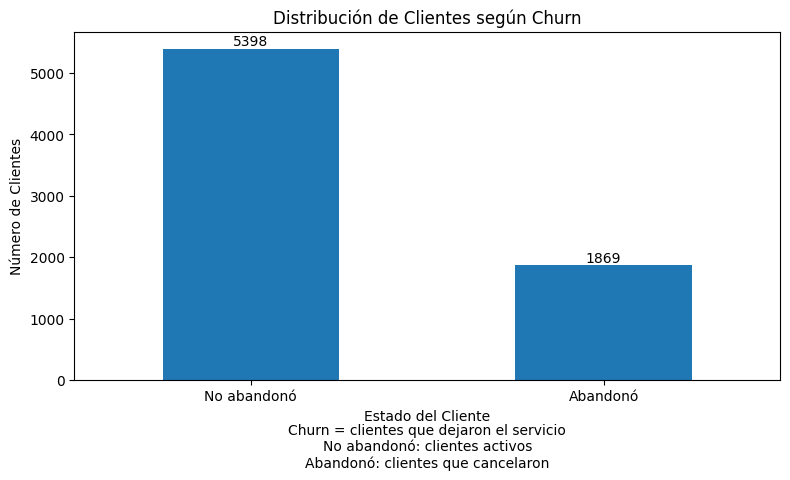

In [152]:
churn_counts = data['Churn'].value_counts()

# Gráfica
ax = churn_counts.plot(
    kind='bar',
    figsize=(8,5),
    title='Distribución de Clientes según Churn'
)

# Etiquetas de ejes
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Número de Clientes')

# Cambiar nombres para mayor claridad
ax.set_xticklabels(['No abandonó', 'Abandonó'], rotation=0)

# Agregar valores encima de cada barra
for i, value in enumerate(churn_counts):
    ax.text(i, value + 50, str(value), ha='center', fontsize=10)

# Agregar nota explicativa
plt.text(
    0.5, -0.25,
    'Churn = clientes que dejaron el servicio\n'
    'No abandonó: clientes activos\n'
    'Abandonó: clientes que cancelaron',
    ha='center',
    transform=ax.transAxes
)

plt.tight_layout()
plt.show()

Realizamos un grafico de pastel para ver intuitivamente los porcentajes de abandono

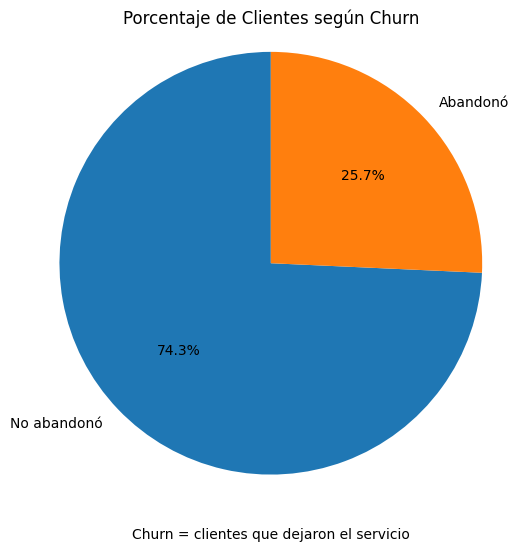

In [153]:
# Conteo de churn
churn_counts = data['Churn'].value_counts()

# Etiquetas más claras
labels = ['No abandonó', 'Abandonó']

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

# Título
plt.title('Porcentaje de Clientes según Churn')

# Mantener forma circular
plt.axis('equal')

# Nota explicativa
plt.text(
    0, -1.3,
    'Churn = clientes que dejaron el servicio',
    ha='center'
)

plt.show()

Aproximadamente el 26% de los clientes abandonó el servicio, mientras que el 74% se mantuvo activo.

Analizaremos la evacion en relacion a otras variables

Por tipo de contrato

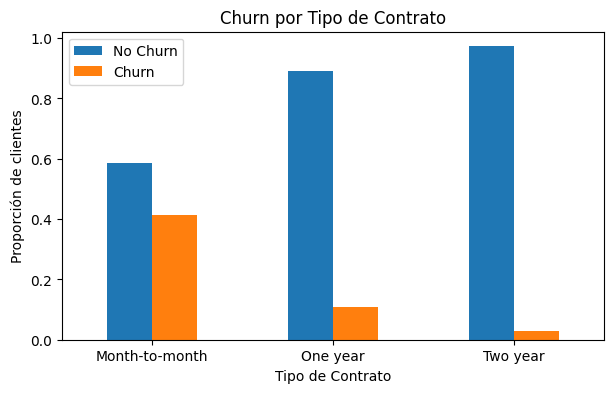

In [170]:
churn_contrato = pd.crosstab(data['account_Contract'], data['Churn'], normalize='index')

# Gráfico
churn_contrato.plot(kind='bar', figsize=(7,4))
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción de clientes')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

Contrato mensual → mayor proporción de churn

Contrato anual / bianual → clientes más estables

Insight estratégico

Incentivar contratos de mayor duración reduce la evasión.

Por genero de cliente

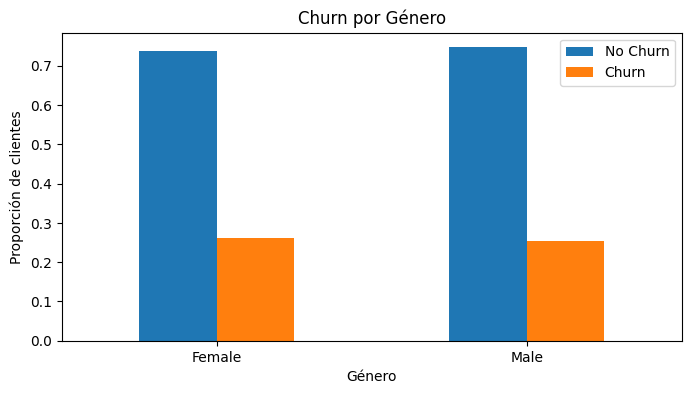

In [169]:
churn_genero = pd.crosstab(data['customer_gender'], data['Churn'], normalize='index')

churn_genero.plot(kind='bar', figsize=(8,4))
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Proporción de clientes')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

El churn suele ser similar entre géneros

Por metodo de pago

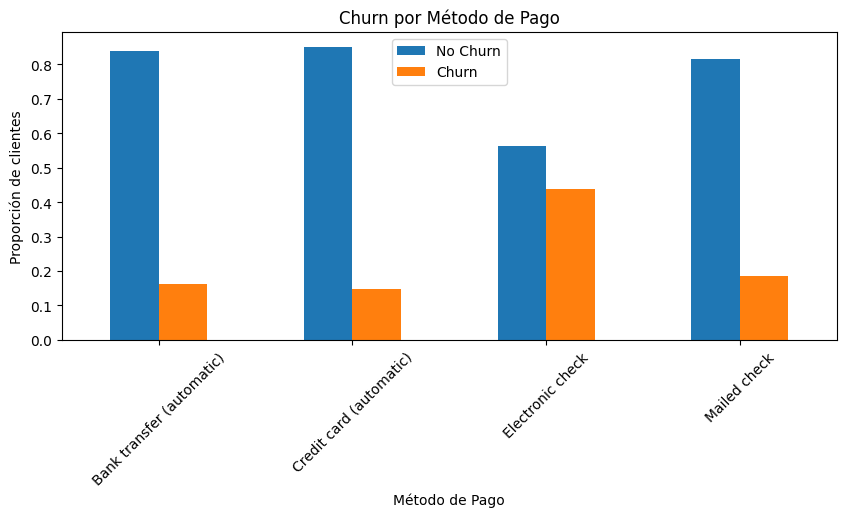

In [167]:
churn_pago = pd.crosstab(data['account_PaymentMethod'], data['Churn'], normalize='index')

churn_pago.plot(kind='bar', figsize=(10,4))
plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Proporción de clientes')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.show()

Electronic check → mayor churn

Tarjeta automática / transferencia → menor churn

Insight estratégico

Métodos de pago automáticos reducen la cancelación del servicio.

La variable churn: 0=cliente que permanece 1= cliente que abandona

Por tipo de servicio de internet

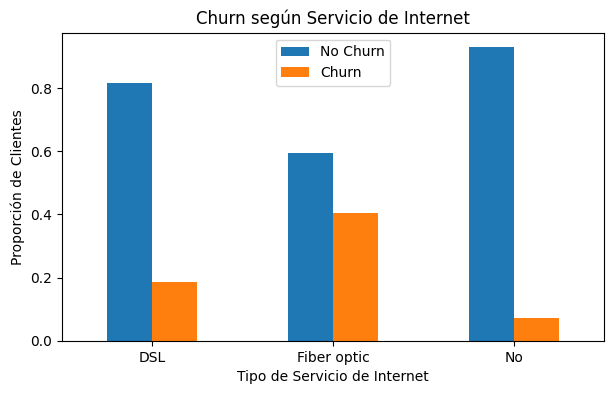

In [166]:
churn_internet = pd.crosstab(
    data['internet_InternetService'],
    data['Churn'],
    normalize='index'
)

# Gráfico
churn_internet.plot(kind='bar', figsize=(7,4))
plt.title('Churn según Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Proporción de Clientes')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

-Fibra óptica

Mayor proporción de churn

Suele asociarse a:

precios más altos

expectativas de mayor calidad

 -DSL

Churn más bajo

Clientes más estables

 -Sin internet

Muy bajo churn

Clientes con servicios básicos

Insight estratégico

Los clientes con servicio de fibra óptica presentan mayor tendencia a cancelar el servicio, lo que sugiere que factores como el costo, la calidad percibida o la competencia influyen significativamente en la evasión.

Por soporte tecnico

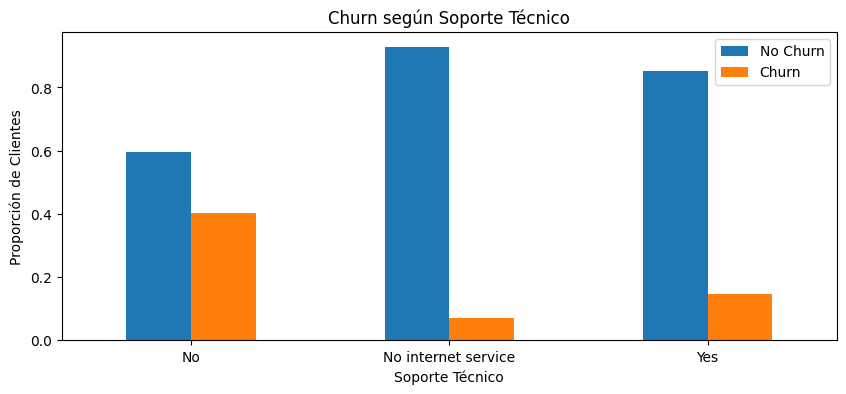

In [165]:
churn_soporte = pd.crosstab(
    data['internet_TechSupport'],
    data['Churn'],
    normalize='index'
)

# Gráfico
churn_soporte.plot(kind='bar', figsize=(10,4))
plt.title('Churn según Soporte Técnico')
plt.xlabel('Soporte Técnico')
plt.ylabel('Proporción de Clientes')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

Clientes sin soporte técnico tienden a cancelar más

Conteo de evasión por variables numéricas

In [160]:
num_cols = [
    'customer_tenure',          # tiempo de contrato
    'account_Charges_Total',    # total gastado
    'account_Charges_Monthly',  # cargo mensual
    'Cuentas_Diarias'           # costo diario
]

In [161]:
data.groupby('Churn')[num_cols].agg(['mean', 'median'])

customer_tenure        account_Charges_Total            \
                 mean median                  mean    median   
Churn                                                          
0.0         37.321045   37.0           2535.263977  1663.625   
1.0         17.979133   10.0           1531.796094   703.550   

      account_Charges_Monthly        Cuentas_Diarias         
                         mean median            mean median  
Churn                                                        
0.0                 61.354224  64.50        2.045141  2.150  
1.0                 74.441332  79.65        2.481378  2.655

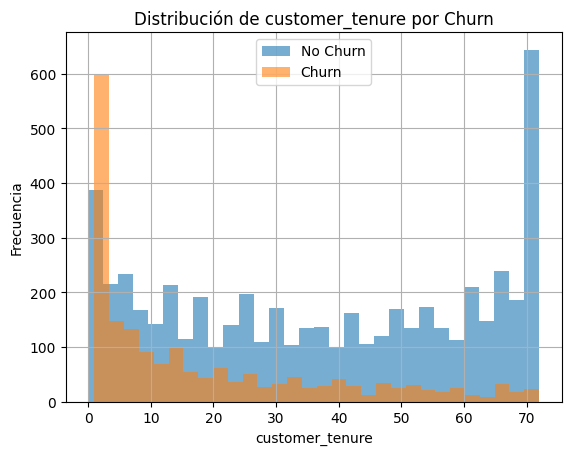

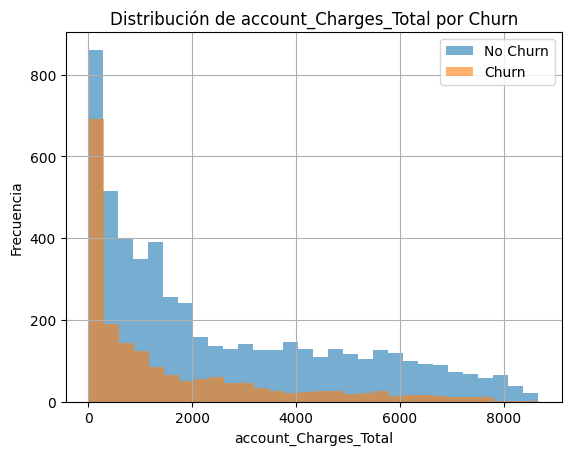

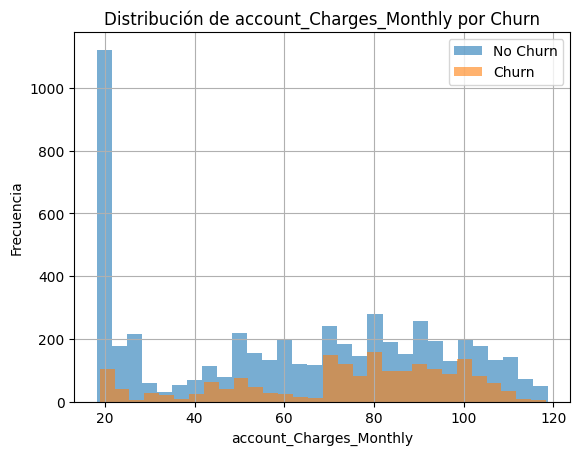

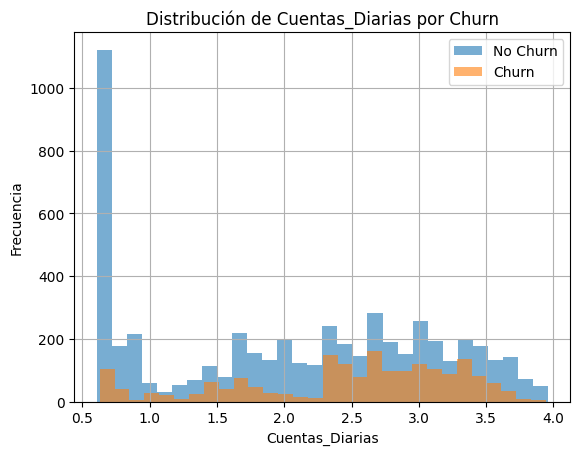

In [164]:
for col in num_cols:
    plt.figure()
    data[data['Churn'] == 0][col].hist(alpha=0.6, bins=30)
    data[data['Churn'] == 1][col].hist(alpha=0.6, bins=30)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(['No Churn', 'Churn'])
    plt.show()

Correlación numérica con churn

In [171]:
data[num_cols + ['Churn']].corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
account_Charges_Monthly,0.189866
Cuentas_Diarias,0.189866
account_Charges_Total,-0.193345
customer_tenure,-0.344079


Correlación negativa fuerte → customer_tenure

Correlación positiva → cargos mensuales / diarios

#📄Informe final

🔹 1. Introducción

El churn de clientes es un factor crítico que impacta directamente en los ingresos y la sostenibilidad del negocio. Este análisis identifica los principales patrones y factores asociados a la cancelación del servicio, a partir del comportamiento del cliente, los servicios contratados y los cargos facturados. Los resultados permiten detectar segmentos con mayor riesgo de evasión y sirven como base para definir estrategias de retención más efectivas y orientadas al negocio.

🔹 2. Limpieza y tratamiento de datos

Se realizó un proceso de limpieza y preparación de datos para asegurar la confiabilidad del análisis. Este incluyó la importación y normalización de datos desde formato JSON, la corrección de tipos de datos, el tratamiento de valores ausentes y la validación de registros únicos. Asimismo, se estandarizaron las variables categóricas y se creó un indicador adicional de costo diario por cliente. Como resultado, se obtuvo un dataset consistente y de alta calidad, adecuado para el análisis y la toma de decisiones estratégicas.

🔹 3. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio se realizó de forma selectiva, enfocándose en variables relevantes para la evasión.

📊 Análisis por variables categóricas

Se analizó la distribución del churn según:

Género

Tipo de contrato

Método de pago

Facturación electrónica

Servicios de internet y soporte técnico

Principales hallazgos visuales:

Los clientes con contrato mensual presentan una tasa de evasión significativamente mayor.

El método de pago electrónico (Electronic check) concentra una mayor proporción de churn.

Los clientes sin soporte técnico tienden a cancelar el servicio con mayor frecuencia.

El género no muestra diferencias relevantes en la evasión.





1.   Los clientes que cancelan tienen menor tiempo de contrato
2.   Los cargos mensuales y diarios más altos están asociados con mayor churn
3.   El total gastado es menor en churn debido a menor permanencia
4.   Existe una relación clara entre precio, antigüedad y evasión









🔹 4. Conclusiones e Insights

A partir del análisis realizado, se concluye que:

La antigüedad del cliente es uno de los factores más importantes: los clientes nuevos tienen mayor riesgo de churn.

Los contratos de corto plazo (mensuales) concentran la mayor evasión.

Los costos elevados, especialmente cuando se analizan a nivel diario, están asociados con una mayor probabilidad de cancelación.

La falta de servicios de soporte incrementa significativamente la evasión.

Existen perfiles claramente identificables de clientes con mayor riesgo de churn.

Estos insights permiten comprender mejor el comportamiento de los clientes y anticipar posibles cancelaciones.

🔹 5. Recomendaciones Estratégicas

Basándose en los resultados del análisis, se sugieren las siguientes acciones:

📌 Incentivar contratos de mayor duración, ofreciendo descuentos o beneficios por permanencia.

📌 Implementar estrategias de retención temprana para clientes con baja antigüedad.

📌 Revisar y optimizar los planes con cargos elevados, asegurando que el valor percibido sea acorde al precio.

📌 Fortalecer el soporte técnico, especialmente para clientes con servicios de internet.

📌 Diseñar campañas específicas para clientes que usan métodos de pago asociados a mayor churn.

✅ Conclusión Final

Este análisis evidencia que un uso adecuado y estructurado de los datos permite identificar patrones claros de evasión de clientes, aportando información valiosa para la toma de decisiones estratégicas enfocadas en la retención. Los resultados obtenidos proporcionan una comprensión más profunda de los perfiles con mayor riesgo de churn y sientan una base sólida para etapas posteriores, como el desarrollo de modelos predictivos, que permitirán anticipar cancelaciones y actuar de forma proactiva para reducir la pérdida de clientes.